In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web

df = web.DataReader('GOOG', data_source = 'yahoo', start = "2012-01-01", end = '2019-12-17')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380500.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749400.0,332.892242
2012-01-05,330.745300,326.889740,329.828735,328.274536,6590300.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405900.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688800.0,310.067780


In [2]:
#Generally upwards growth from graphs (NOW DELETED THEm)
data = df.filter(['Close'])
dataset = data.values

train_length = int(len(dataset) * 0.8)

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(dataset)

train_data = scaled_data[:train_length, :]

x_train = []
y_train = []

for i in range(60, train_length):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i, 0])

x_train, y_train = np.asarray(x_train).astype(np.float32), np.asarray(y_train).astype(np.float32)


In [3]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])

model.fit(x_train, y_train, batch_size = 1, epochs = 1)


1542/1542 [==============================] - 32s 21ms/step - loss: 0.0014 - accuracy: 6.4851e-04


In [5]:
test_data = scaled_data[train_length - 60:]

x_test = []
y_test = dataset[train_length:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i])

x_test = np.asarray(x_test).astype(np.float32)

In [6]:
predictions = model.predict(x_test)
predictions = minmaxscaler.inverse_transform(predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


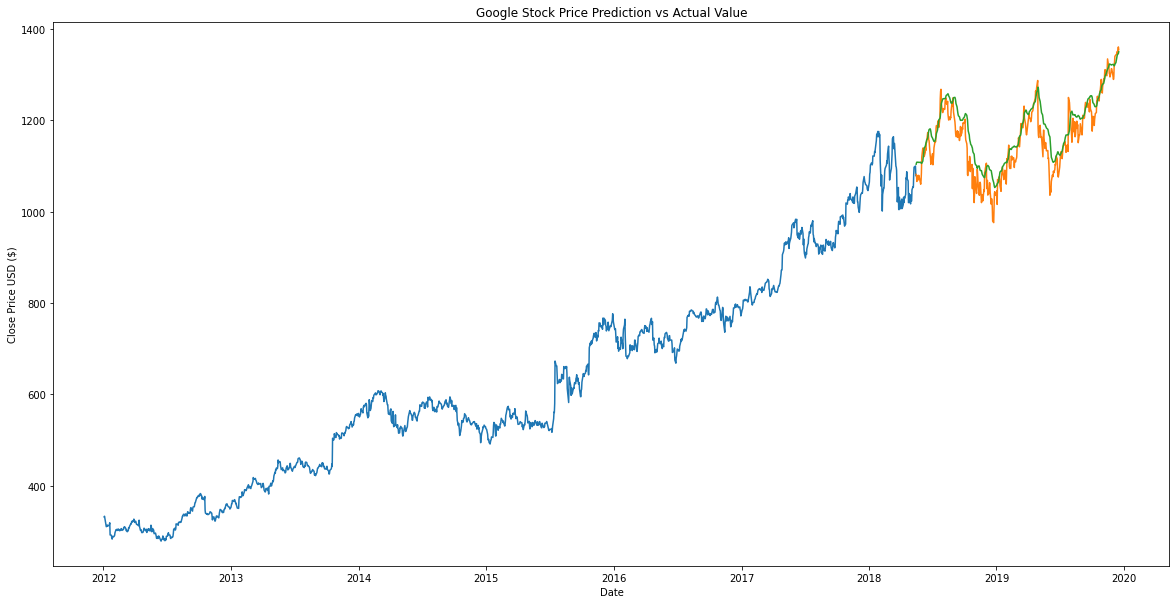

In [7]:
train = data[:train_length]
valid = data[train_length:]
valid["Predictions"] = predictions

plt.figure(figsize = (20,10))
plt.title("Google Stock Price Prediction vs Actual Value")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(train["Close"])
plt.plot(valid["Close"])
plt.plot(valid["Predictions"])
plt.show()